<a href="https://colab.research.google.com/github/fundaylncii/MachineLearning/blob/main/UnbalacedDataSetProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dengesiz veri seti sınıflandırma problemlerinde görülür ve sınıf dağılımlarının birbirine yakın olmadığı durumlarda ortaya çıkar. Problem çoğunluğa sahip sınıfın azınlık sınıfını domine etmesinden kaynaklanır. Oluşturulan model çoğunluğa sahip sınıfa yakınlık gösterir, bu da azınlık sınıfının kötü sınıflandırılmasına sebep olur.

Dengesiz veri setleriyle karşılaştığımızda doğru gözlem yapabilmek ve dengeyi sağlayabilmek için uygulayabileceğimiz çeşitli yöntemler vardır:



* Doğru Metrik Seçimi
* Precision
* Recall
* F1-score
* ROC Curve
* AUC






* Resampling
** Oversampling
** Random Oversampling
** SMOTE Oversampling

* Resampling
** Undersampling
** Random Undersampling
** NearMiss Undersampling
** Undersampling (Tomek links)
** Undersampling (Cluster Centroids)


Daha fazla veri toplamak
Sınıflandırma modellerinde bulunan “class_weight” parametresi kullanılarak azınlık ve çoğunluk sınıflarından eşit şekilde öğrenebilen model yaratılması,
Tek bir modele değil , diğer modellerdeki performanslara da bakılması,
Daha farklı bir yaklaşım uygulanıp Anomaly detection veya Change detection yapmak

In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,rcParams
import itertools

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# Veri setinin okutulması
df = pd.read_csv("creditcard.csv")
df.head()

In [ ]:
# Veri setindeki değişken ve gözlem sayısı
print("Gözlem sayısı : " ,len(df))
print("Değişken sayısı : ", len(df.columns))

In [ ]:
# veri setindeki değişkenlerin tiplerini ve boş değer içerip içermediğini gözlemlemek istiyoruz
df.info()

In [ ]:
# 1 sınıfının veri setinde bulunma oranı %0.2, 0 sınıfının ise %99.8
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dağılım')
ax[0].set_ylabel('')
sns.countplot('Class',data=df,ax=ax[1])
ax[1].set_title('Class')
plt.show()

In [ ]:
# Time ve Amount değişkenlerini standartlaştırma
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.head()

In [ ]:
# Hold out yöntemi uygulayıp veri setini eğitim ve test olarak ikiye ayırıyoruz.(%80,%20)
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

In [ ]:
# modelin tanımlanıp, eğitilmesi ve başarı skoru
model = LogisticRegression(random_state=123456)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f"%(accuracy))

Accuracy: 0.999

Accuracy sistemde doğru olarak yapılan tahminlerin tüm tahminlere oranıdır

Modelin doğruluk skoru 0.999. Modelimiz mükemmel çalışıyor diyebiliriz, değil mi?

Performansını incelemek için birde Confusion Matrix'ine bakalım.


**Confusion Matrix**, bir sınıflandırma modelinin gerçek değerlerinin test verisi üzerindeki performansını açıklamak için kullanılan bir tablodur.

Tahmini ve gerçek değerlerin 4 farklı kombinasyonunu içermektedir.

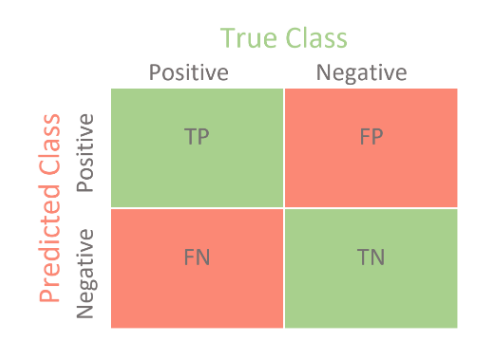

* True Positives (TP) : Pozitif tahmin edildi ve bu doğru.
* True Negative (TN) : Negatif tahmin edildi ve bu doğru.
* False Positive (FP) : Pozitif tahmin edildi ve bu yanlış.
* False Negative (FN) : Negatif tahmin edildi ve bu yanlış.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

* Non Fraud sınıfı için 56870 (TP) doğru, 5 (FP) yanlış toplam 56875 tahmin yapılmış.

* Fraud sınıfı için 31 (FN) yanlış, 56 (TN) doğru toplam 87 tahmin yapılmış.

Doğruluk değerinin (Accuracy Score) yeterli olmadığını gördük. Modelin performansını ölçmek için farklı metriklere bakmamız gerekiyor.

Precision (Kesinlik): Pozitif olarak tahmin edilenlerin ne kadarının gerçekte pozitif olduğunu gösterir. Eğer precision düşük ise çok sayıda hatalı pozitif olduğunu ifade eder.

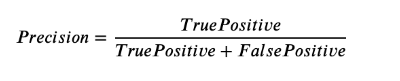

Recall (Duyarlılık): Pozitif olarak tahmin etmemiz gereken değerlerin ne kadarını pozitif tahmin ettiğimizi gösterir. Eğer recall düşük ise çok sayıda yanlış negatif olduğunu ifade eder. Mümkün olduğu kadar yüksek olmalıdır.

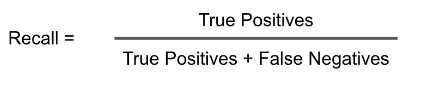

F1 score: Düşük precison ve yüksek recall veya tam tersi durumda iki modeli karşılaştırmak güçtür. Karşılaştırılabilir bir hale getirmek F1 score'u precision ve recall'u aynı anda ölçülmesine yardımcı olur. Precision ve Duyarlılık değerlerinin harmonik ortalamasını göstermektedir.

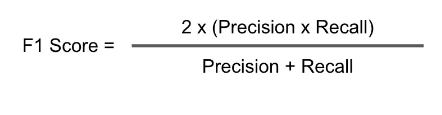

In [ ]:
#sınıflandırma raporu
print(classification_report(y_test, y_pred))

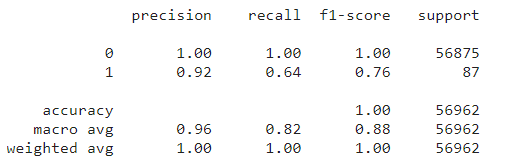

Precision ölçüsünü herbir sınıf için inceleyelim.

* 0 (non fraud )sınıfı için yapılan tahminlerden kaçının doğru olduğunu verir. Confusion matrix'ine bakıldığında 56870 + 31 = 56901 tane non fraud sınıfı tahmini yapılmış ve bunun 56870 tanesi doğru tahmin edilmiş. 0 sınıfı için Precision değeri 1'dir (56870 / 56901 )

* 1 (fraud) sınıfı için yapılan tahminlerden kaçının doğru olduğunu verir. Confusion matrix'ine bakıldığında 5 + 56 = 61 tane fraud sınıfı tahmini yapılmış ve bunun 56 tanesi doğru tahmin edilmiş. 0 sınıfı için Precision değeri 0.92'dir (56 / 61)

Recall ölçüsünü herbir sınıf için inceleyelim.

* 0(non fraud) sınıfı için tahmin etmemiz gereken değerlerin ne kadarını doğru tahmin ettiğimizi gösterir. 56870 + 5 = 56875 tane non fraud sınıfına ait gözlemimiz var ve bunların 56870 i doğru tahmin edilmiş. 0 sınıfı için recall değeri 56870 / 56875 = 1 'dir.

* 1(fraud) sınıfı için tahmin etmemiz gereken değerlerin ne kadarını doğru tahmin ettiğimizi gösterir. 31 + 56 = 87 tane fraud sınıfına ait gözlemimiz var ve bunların 56'si doğru tahmin edilmiş. 1 sınıfı için recall değeri 56 / 87 = 0.64 'dir.

Recall değerinlerine bakıldığında 1 sınıfın tahmin edilme başarısızlığını çok rahat görebiliyoruz.

F1-score'u da recall ve precision değerlerinin harmonik ortalamsını ifade ediyor.

Support ise sınıfların gerçek değerlerinin sayısını ifade etmekte. Ölçümlerin yapısal zayıflıklarını gösterebilir yani Sınıflar arasındaki gözlem sayısındaki dengesizliğin ölçümleri etkilediğini söyliyebiliriz.

# **ROC curve**
ROC eğrisi , tüm sınıflandırma eşiklerinde bir sınıflandırma modelinin performansını gösteren bir grafiktir. Bu eğri iki parametreyi çizer:

True Positive Rate : Recall

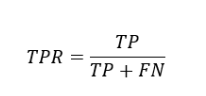

False Positive Rate : Fraud'ı tespit etmedeki başarısızlık

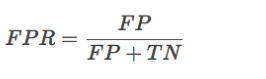

Farklı sınıflandırma eşiklerinde gerçek pozitif oran ve yanlış pozitif oran eğrisidir. (0,0) ‘da başlar ve (1,1)’ de biter. İyi bir model, 0'dan 1'e hızla giden bir eğri üretir.

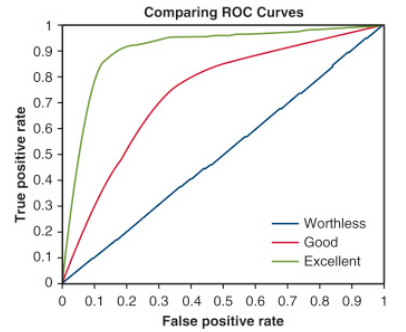

# AUC (Area under the ROC curve)
ROC eğrisini tek bir sayı ile özetler. (0,0) 'dan (1,1)' e kadar tüm ROC eğrisinin altındaki iki boyutlu alanın tamamını ölçer. En iyi değer 1, en kötü değeri 0.5'dir.

In [ ]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr)
    plt.show()
    pass

generate_auc_roc_curve(model, X_test)

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC ROC Curve with Area Under the curve = %.3f"%auc)

Not : ROC eğrisinin (AUC) altındaki alan, genel sınıflandırma performansını değerlendirir. AUC, bir sınıfa diğerine daha fazla önem vermediğinden, azınlık sınıfını iyi yansıtmamaktadır.

Dengesizliği gidermek için çeşitli yöntemleri veri setine uygulayalım.

NOT: Yöntemler eğitim setine uygulanmalıdır. Test setine uygulanırsa doğru değerlendirme yapılamaz.

Resampling
Yeniden örnekleme(Resampling), azınlık sınıfına yeni örnekler ekleyerek veya çoğunluk sınıfından örnekler çıkarılarak veri setinin daha dengeli hale getirilmesidir.

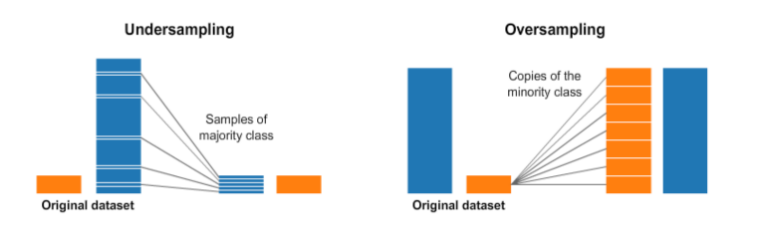

Oversampling
Azınlık sınıfına ait örneklerin kopyalanmasıyla veri setini dengeler.

Random Oversampling:

Azınlık sınıfından rastgele seçilen örneklerin eklenmesiyle veri setinin dengelenmesidir.
Veri setiniz küçükse bu teknik kullanılabilinir.
Overfitting’e neden olabilir.
RandomOverSampler metodu sampling_strategy argümanını almakta, sampling_stratefy='minority' dendiğinde azınlık sınıfının sayısını çoğunluk sınıfının sayısa eşitleyecek şekilde artırır.

Bu argümana float bir değerde girebiliriz. Örneğin azınlık sınıfımızın sayısı 1000, çoğunluk sınıfının sayısı 100 olsun. sampling_stratefy = 0.5 dersek, azınlık sınıfının sayısı 500 olucak şekilde ekleme yapılacaktır.

In [ ]:
# random oversampling önce eğitim setindeki sınıf sayısı
y_train.value_counts()

In [ ]:
# RandomOver Sampling uygulanması (Eğitim setine uygulanıyor)
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_randomover, y_randomover = oversample.fit_resample(X_train, y_train)

In [ ]:
# random oversampling den sonra eğitim setinin sınıf sayısı
y_randomover.value_counts()

In [ ]:
# modelin eğitilmesi ve başarı oranı
model.fit(X_randomover, y_randomover)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

In [ ]:
#sınıflandırma raporu
print(classification_report(y_test, y_pred))

Random Oversampling uygulandıktan sonra eğitilen modelin doğruluk değeri 0.97'dır, düşüş gözlenmekte. Confusion Matrix ve Sınıflandırma raporuna bakıldığında, tahmin edilen fraud sınıflarının yanlış çıkma oranı yüksek görünüyor, bu da 1 sınıfın precision değerini düşürmüş durumda. Ama 1 sınıfının recall değerinde de bir yükseliş var, modelin fraud sınıfını doğru tahmin etme oranı artmıştır. İlk modele göre Non fraud sınıfının tahmin edilme başarısı düşmüş durumda ama fraud sınıfının doğru tahmin edilmesindeki yükselme randomoversampling yapıldıktan sonra oluşturulmuş modeli tercih etmemizde büyük bir etken.

SMOTE Oversampling:

Overfitting’i önlemek için azınlık sınıfından sentetik örnekler oluşturulması.

Önce azınlık sınıfından rastgele bir örnek seçilir.
Daha sonra bu örnek için en yakın komşulardan k tanesi bulunur.
k en yakın komşulardan biri rastgele seçilir ve azınlık sınıfından rastgele seçilen örnekle birleştirilip özellik uzayında bir çizgi parçası oluşturarak sentetik örnek oluşturulur.

In [ ]:
# smote dan önce eğitim setindeki sınıf sayısı
y_train.value_counts()

In [ ]:
# Smote uygulanması (Eğitim setine uygulanıyor)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
# smote dan sonra eğitim setinin sınıf sayısı
y_smote.value_counts()

In [ ]:
# modelin eğitilmesi ve başarı oranı
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

In [ ]:
#sınıflandırma raporu
print(classification_report(y_test, y_pred))

# Undersampling
Çoğunluk sınıfına ait örneklerin çıkarılmasıyla veri setini dengeleme tekniğidir. Büyük veri setine sahip olunduğunda kullanılabilir. Elimizdeki veri seti büyük olmadığı için verimli sonuçlar alınmayacaktır. Ama yöntemleri açıklayıp bazılarının nasıl uygulanabiliceğini göstereceğim.

Random Undersampling:

Çıkarılan örnekler rastgele seçilir.
Büyük veri setine sahipseniz bu tekniği kullanabilirsiniz.
Rastgele seçimden dolayı bilgi kaybı yaşanabilir.

In [ ]:
# random undersampling den önce eğitim setindeki sınıf sayısı
y_train.value_counts()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# transform the dataset
ranUnSample = RandomUnderSampler()
X_ranUnSample, y_ranUnSample = ranUnSample.fit_resample(X_train, y_train)

In [ ]:
# Random undersampling sonra
y_ranUnSample.value_counts()

# NearMiss Undersampling:

Bilgi kaybını önler.
KNN algoritmasına dayanır.
Çoğunluk sınıfına ait örneklerin azınlık sınıfına ait örneklerle olan uzaklığı hesaplanır.
Belirtilen k değerine göre uzaklığı kısa olan örnekler korunur.
# Undersampling (Tomek links):

Farklı sınıflara ait en yakın iki örneğin arasındaki çoğunluk sınıfının örnekleri kaldırılarak, iki sınıf arasındaki boşluk arttırılır.

# Undersampling (Cluster Centroids):

Önemsiz örneklerin veri setinden çıkarılmasıdır.Örneğin önemli veya önemsiz olduğu kümelemeyle belirlenir.

Undersampling ve Oversampling tekniklerinin bir araya gelmesiyle daha dengeli veri setleri oluşturulabilinir.

# Diğer Yöntemler
Daha fazla veri toplamak,
Sınıflandırma modellerinde bulunan “class_weight” parametresi kullanılarak azınlık ve çoğunluk sınıflarından eşit şekilde öğrenebilen model yaratılması,
Tek bir modele değil , diğer modellerdeki performanslara da bakılması,
Daha farklı bir yaklaşım uygulanıp Anomaly detection veya Change detection yapmak
gibi yöntemlerle de dengesiz veri setiyle başa çıkılır.

Hangi yöntemin en iyi sonuç vereceği elimizdeki veri setine bağlıdır. Yöntemler denenerek veri setine en uygun olanın seçilmesi en iyi sonucu sağlar diyebiliriz.